## Курс "Анализ временных рядов"

### Задание 2

### Моделирование временных рядов


Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(16, 4)})

### Упражнения 1

1. Реализуйте модель логистического тренда Facebook Prophet

    $y(t) = \frac{c(t)}{1+\exp(-(k + a(t)^T \delta)(t-m-a^T\gamma))}$
2. Для модели тренда добавьте аддитивную квартальную сезонность.
3. Для модели тренда добавьте мультипликативную ежемесячную сезонность.
4. Реализуйте мультипликативную детерминированную модель временных рядов с
сезонной, циклической и трендовой частями.
5. К модели добавьте падение спроса в праздничные дни в начале года.

1. Реализуйте модель логистического тренда

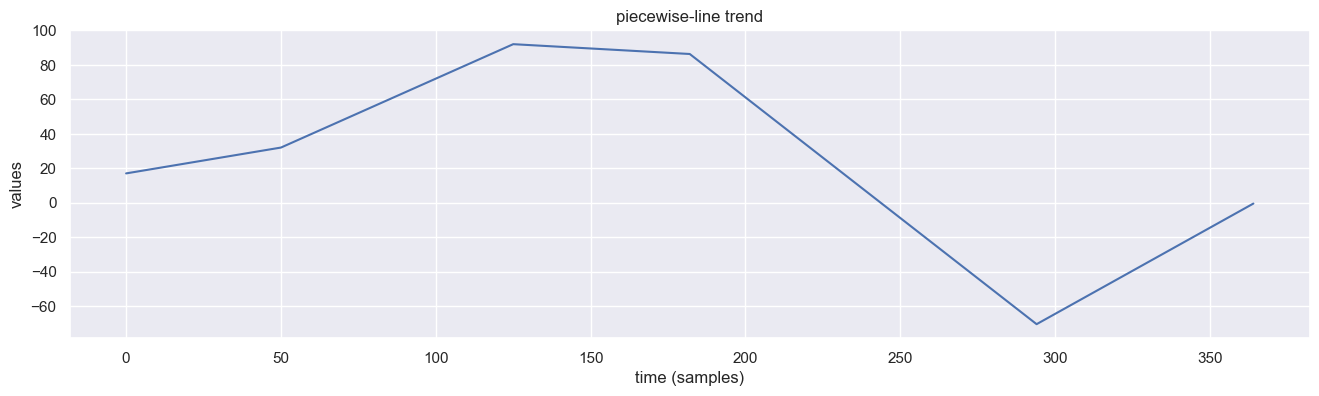

In [2]:
N_OF_SAMPLES=365 # Number of samples

k = 0.3
m = 17

n = np.arange(N_OF_SAMPLES)

inflection_points = np.array([50, 125, 182, 294])#change points

a = np.zeros(shape=(inflection_points.size, N_OF_SAMPLES)) #  the matrix of growth changing 


a = ((n[:,None] > inflection_points) * 1).T


delta = np.array([0.5, -0.9, -1.3,  2.4])#vector with growth rate adjustments

growth = (k + np.dot(a.T,delta)) 

gamma = -inflection_points * delta
offset = m + np.dot(a.T,gamma)

ts = growth* n + offset


fig, ax = plt.subplots()
ax.plot(ts)
ax.set(xlabel='time (samples)', 
       ylabel='values',
       title='piecewise-line trend')
plt.show()

2. Для модели тренда добавьте аддитивную квартальную сезонность.

- Смоделируем квартальную сезонность

number of periods =  4.0


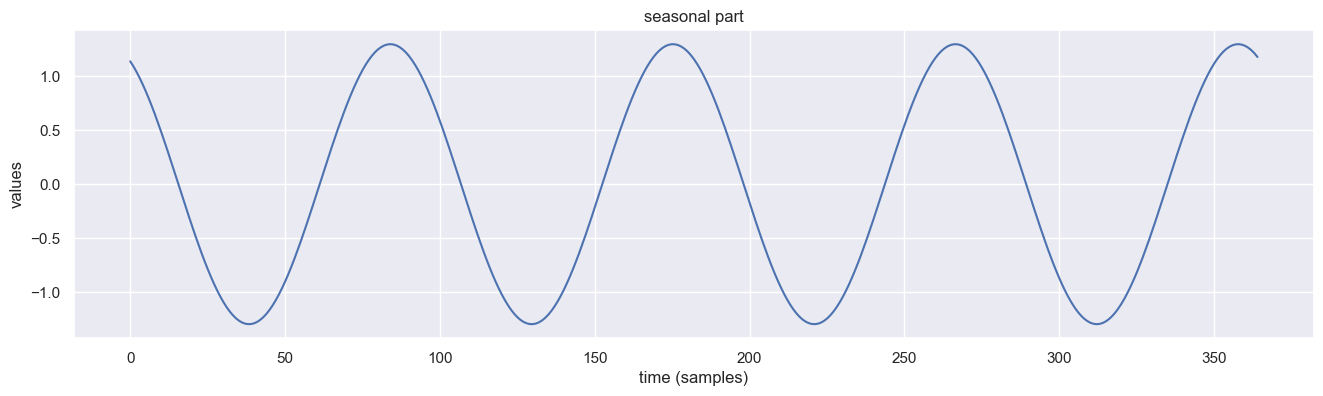

In [3]:
N_OF_SAMPLES=365 # Number of samples

n  = np.arange(N_OF_SAMPLES)

a = 1.3

Ts = 1/365

T =1/4

theta = 0.5

print('number of periods = ',N_OF_SAMPLES*Ts/T)

ts = a*np.cos(2*np.pi*n*Ts/T+theta)

fig, ax = plt.subplots()
ax.plot(ts)
ax.set(xlabel='time (samples)', 
       ylabel='values',
       title='seasonal part')
plt.show()

3. Для модели тренда добавьте мультипликативную ежемесячную сезонность.

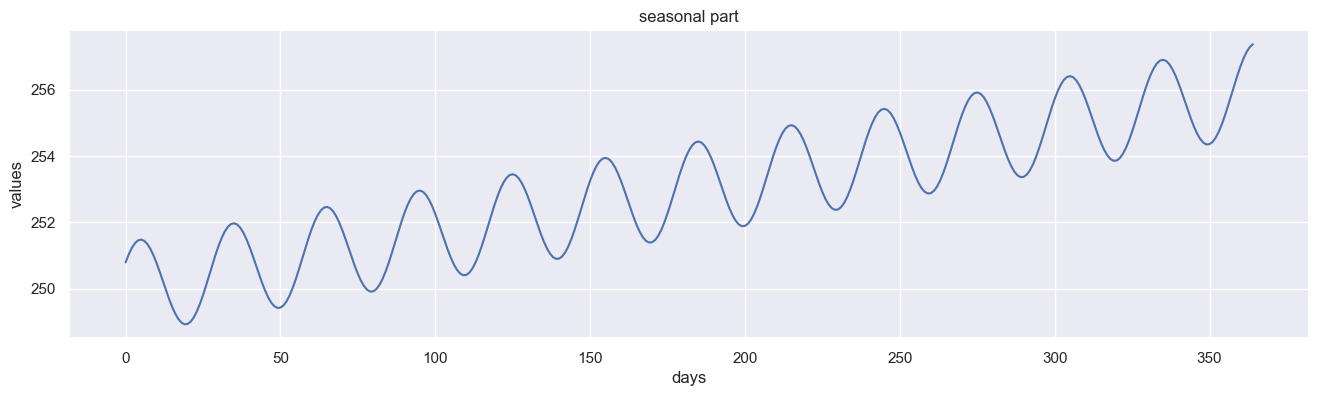

In [4]:
YEAR = 365

MONTH = 30

N_OF_DAYS=YEAR# Number of samples

days  = np.arange(N_OF_DAYS)

a_m = 1.4 #month influence

T_m = MONTH/YEAR

Ts = 1/YEAR

theta_m = 0.6

a_trend = 6 #slope

bias_trend = 250

trend = a_trend*days*Ts+bias_trend 

seasonality = a_m*np.sin(2*np.pi*days*Ts/T_m + theta_m) 

ts =trend + seasonality

fig, ax = plt.subplots()
ax.plot(ts)
ax.set(xlabel='days', 
       ylabel='values',
       title='seasonal part')
plt.show()

4. Реализуйте мультипликативную детерминированную модель временных рядов с
сезонной, циклической и трендовой частями.

- Цикличность тренда

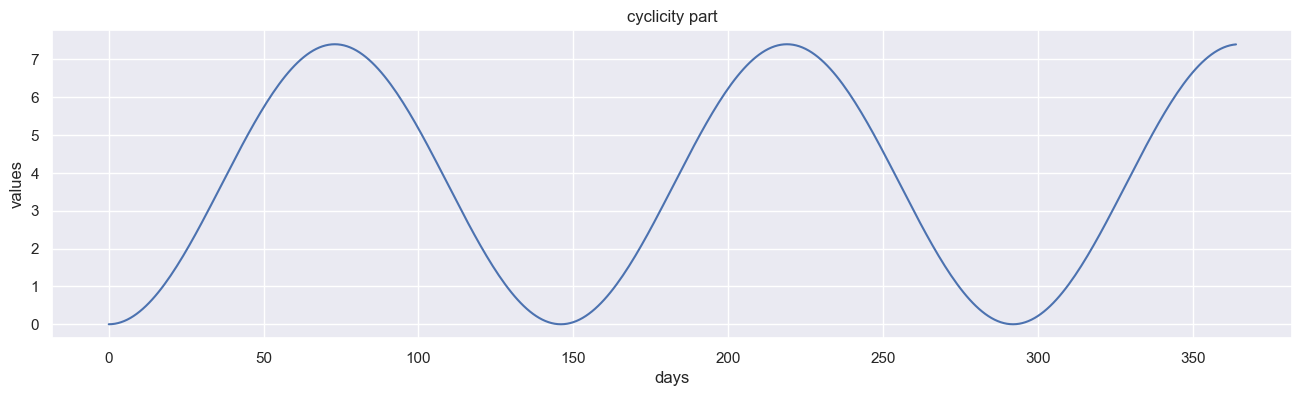

In [5]:
a_cycl = 3.7
T_cycl = 0.4
cyclicity = a_cycl - a_cycl *np.sin(2*np.pi*days*Ts/T_cycl + np.pi/2)

ts =cyclicity

fig, ax = plt.subplots()
ax.plot(ts)
ax.set(xlabel='days', 
       ylabel='values',
       title='cyclicity part')
plt.show()

- Теперь мы можем добавить цикличность к линейному тренду

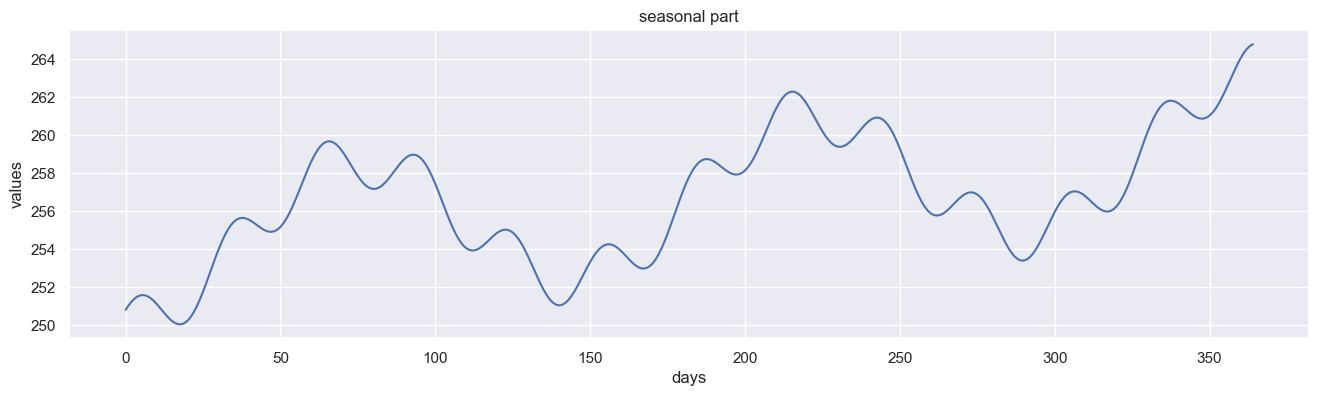

In [6]:
YEAR = 365

MONTH = 30

N_OF_DAYS=YEAR# Number of samples

days  = np.arange(N_OF_DAYS)

a_m = 1.4 #month influence

T_m = MONTH/YEAR

Ts = 1/YEAR

theta_m = 0.6

a_trend = 6 #slope

bias_trend = 250

trend = a_trend*days*Ts+bias_trend 

seasonality = a_m*np.sin(2*np.pi*days*Ts/T_m + theta_m) 

a_cycl = 3.7
T_cycl = 0.4
cyclicity = a_cycl - a_cycl *np.sin(2*np.pi*days*Ts/T_cycl + np.pi/2)

ts =trend + seasonality + cyclicity

fig, ax = plt.subplots()
ax.plot(ts)
ax.set(xlabel='days', 
       ylabel='values',
       title='seasonal part')
plt.show()

5. К модели добавьте падение спроса в праздничные дни в начале года.

In [7]:
k = 10 # количество праздничных дней
f = 0.95 # коэффициент падения спроса
for x in range(k+1):
    ts[x] = f*ts[x]

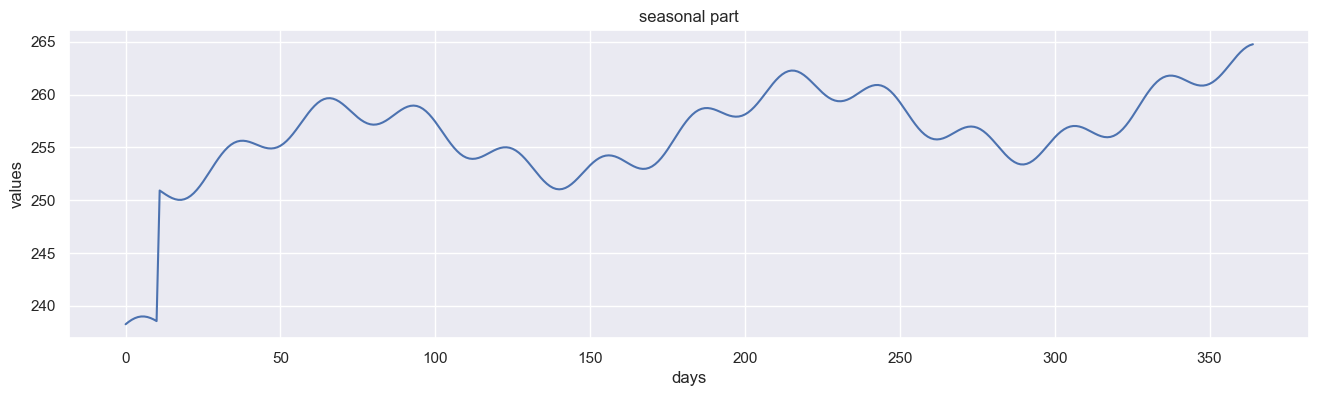

In [8]:
fig, ax = plt.subplots()
ax.plot(ts)
ax.set(xlabel='days', 
       ylabel='values',
       title='seasonal part')
plt.show()

### Упражнения 2

1. Исследовать влияние аддитивного стационарного и нестационарного белого шума на временные ряды с сезонными частями и частями тренда в следующей форме $$ y(t) = a_0 + trend(t) +seasonal(t) + cyclic(t) + \text{rare_events(t)}+ noise(t). $$
2. Смоделировать модель временного ряда в следующем виде
$$y(t) = a_0 + (trend(t) \cdot cyclic(t) + seasonal_1(t))\cdot seasonal_2(t) + noise(t).$$

3. Исследуйте 3 модели случайного блуждания:  
    * Модель с дрейфом $$y(t) =\alpha + y(t-1) + \eta(t) $$   
    * Модель с трендом $$y(t) =\alpha + \beta\cdot t + y(t-1) + \eta(t) $$  
    * Модель с изменением интенсивности $$y(t) = y(t-1) + \eta(t) , \\ \eta(t)\sim N(0, \sigma^2(t)),\\ \sigma^2(t) = \sigma_0 + \gamma\cdot t $$

**Решение**

1. Исследовать влияние аддитивного стационарного и нестационарного белого шума на временные ряды с сезонными частями и частями тренда в следующей форме $$ y(t) = a_0 + trend(t) +seasonal(t) + cyclic(t) + \text{rare_events(t)}+ noise(t). $$

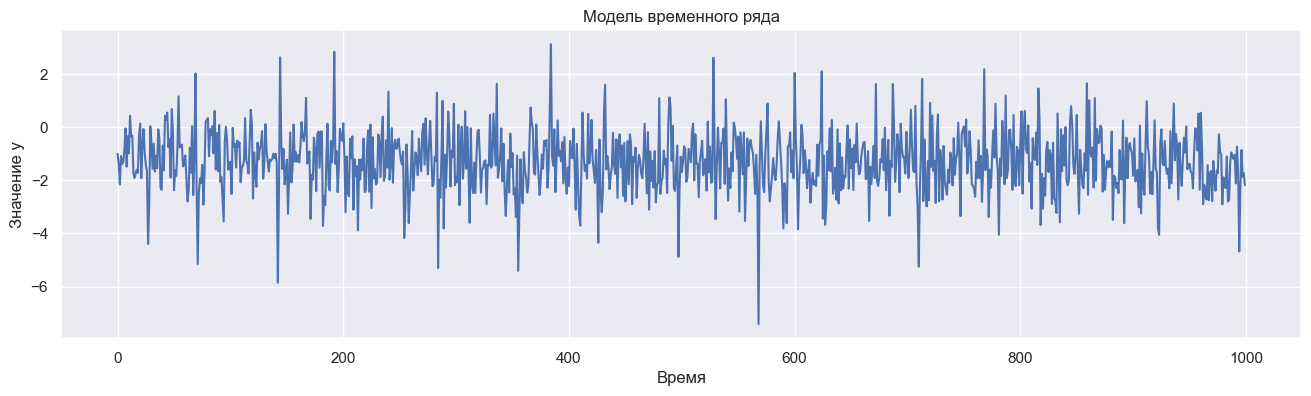

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем параметры модели
a0 = -1
trend_coef = -0.05
seasonal1_coef = -0.2
cyclic_coef = 0.1

n = 1000

# Инициализируем массив для значений y
y = np.zeros(n)
y[0] = a0

# Генерируем случайный шум
noise = np.random.normal(0, 1, n)

# Симулируем временной ряд
for i in range(1, n):
    trend = trend_coef*np.log(i)
    seasonal1 = seasonal1_coef*np.sin(2*np.pi*i/12)
    cyclic = cyclic_coef*np.cos(2*np.pi*i/6)
    
    rare_events = 0
    if i % 48 == 0:
        rare_events = 3
    elif i % 71 == 0:
        rare_events = -4
    
    y[i] = a0 + trend + seasonal1 + cyclic + rare_events + noise[i]

# Визуализируем результаты
plt.plot(y)
plt.title('Модель временного ряда')
plt.xlabel('Время')
plt.ylabel('Значение y')
plt.show()

2. Смоделировать модель временного ряда в следующем виде
$$y(t) = a_0 + (trend(t) \cdot cyclic(t) + seasonal_1(t))\cdot seasonal_2(t) + noise(t).$$

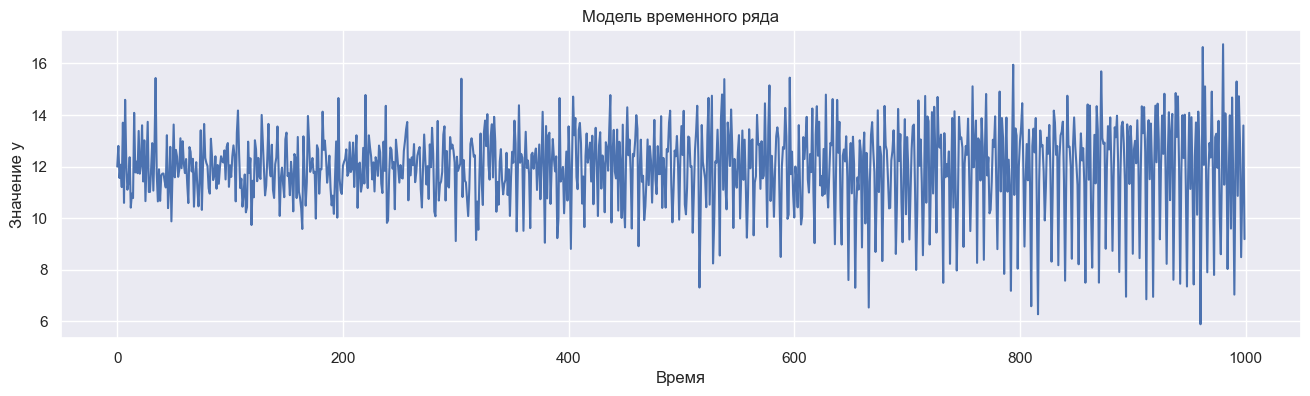

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем параметры модели
a0 = 12
trend_coef = 0.15
cyclic_coef = 0.1
seasonal1_coef = 0.2
seasonal2_coef = -0.3

n = 1000

# Инициализируем массив для значений y
y = np.zeros(n)
y[0] = a0

# Генерируем случайный шум
noise = np.random.normal(0, 1, n)

# Симулируем временной ряд
for i in range(1, n):
    trend = trend_coef*i
    cyclic = cyclic_coef*np.cos(2*np.pi*i/12)
    seasonal1 = seasonal1_coef*np.sin(2*np.pi*i/12)
    seasonal2 = seasonal2_coef*np.cos(2*np.pi*i/4)
    
    y[i] = a0 + (trend*cyclic + seasonal1)*seasonal2 + noise[i]

# Визуализируем результаты
plt.plot(y)
plt.title('Модель временного ряда')
plt.xlabel('Время')
plt.ylabel('Значение y')
plt.show()

3. Исследуйте 3 модели случайного блуждания:  

* Модель с дрейфом $$y(t) =\alpha + y(t-1) + \eta(t) $$  

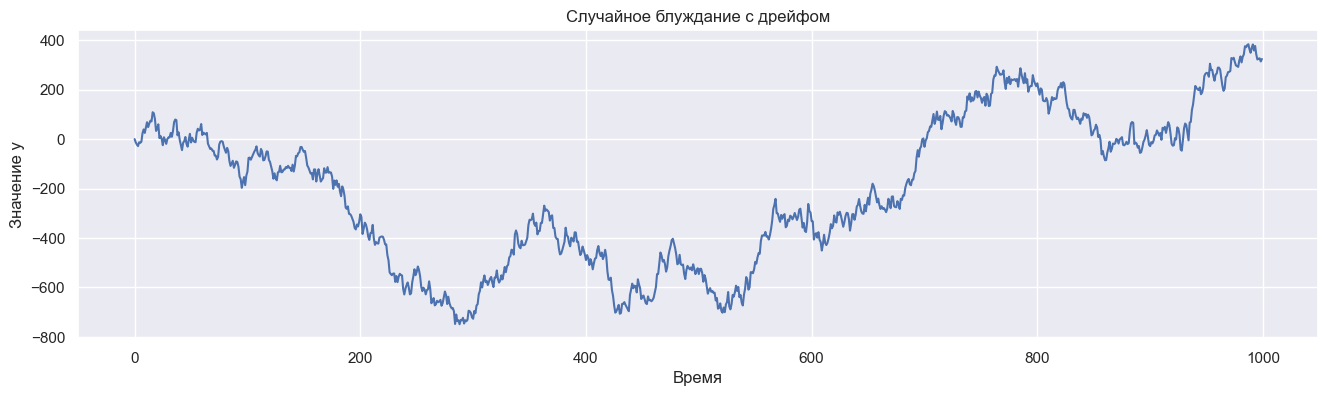

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем параметры модели
alpha = 0.5
sigma = 24.3
n = 1000

# Генерируем случайные шумы
noise = np.random.normal(0, sigma, n)

# Инициализируем массив для значений y
y = np.zeros(n)
y[0] = 0

# Симулируем случайное блуждание с дрейфом
for i in range(1, n):
    y[i] = alpha + y[i-1] + noise[i]

# Визуализируем результаты
plt.plot(y)
plt.title('Случайное блуждание с дрейфом')
plt.xlabel('Время')
plt.ylabel('Значение y')
plt.show()

* Модель с трендом $$y(t) =\alpha + \beta\cdot t + y(t-1) + \eta(t) $$ 

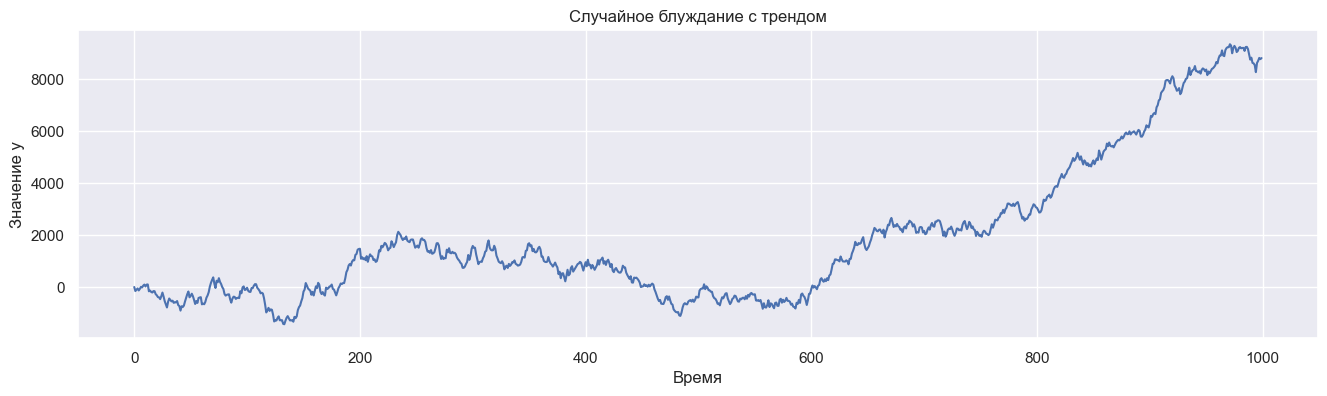

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем параметры модели
alpha = 0.3
beta = 0.02
sigma = 123.1
n = 1000

# Генерируем случайные шумы
noise = np.random.normal(0, sigma, n)

# Инициализируем массив для значений y
y = np.zeros(n)
y[0] = 0

# Симулируем случайное блуждание с трендом
for i in range(1, n):
    y[i] = alpha + beta*i + y[i-1] + noise[i]

# Визуализируем результаты
plt.plot(y)
plt.title('Случайное блуждание с трендом')
plt.xlabel('Время')
plt.ylabel('Значение y')
plt.show()

   * Модель с изменением интенсивности $$y(t) = y(t-1) + \eta(t) , \\ \eta(t)\sim N(0, \sigma^2(t)),\\ \sigma^2(t) = \sigma_0 + \gamma\cdot t $$

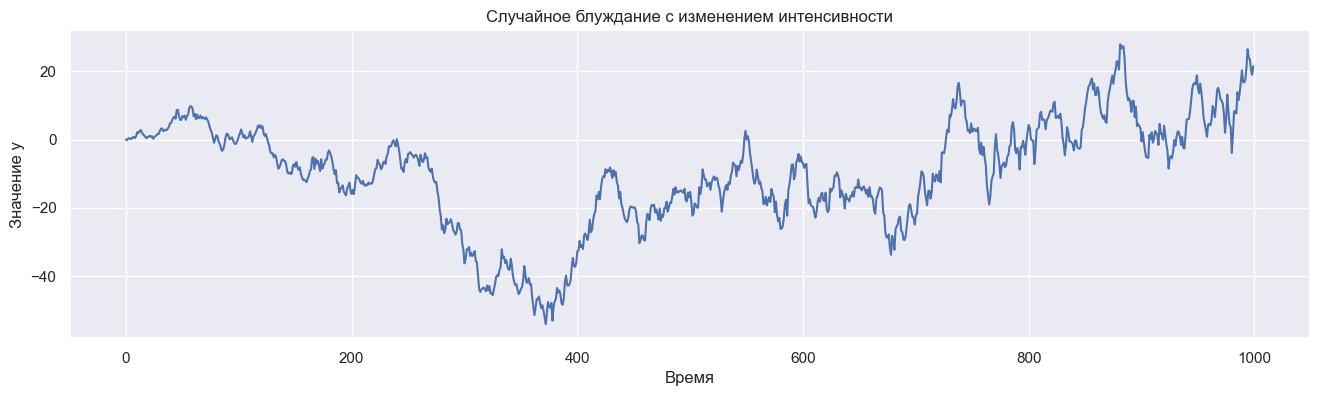

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем параметры модели
sigma_0 = 0.1
gamma = 0.01
n = 1000

# Инициализируем массив для значений y и sigma^2
y = np.zeros(n)
y[0] = 0
sigma_sq = np.zeros(n)
sigma_sq[0] = sigma_0

# Симулируем случайное блуждание с изменением интенсивности
for i in range(1, n):
    # Вычисляем новое значение sigma^2
    sigma_sq[i] = sigma_0 + gamma*i
    
    # Генерируем случайный шум
    noise = np.random.normal(0, np.sqrt(sigma_sq[i]), 1)
    
    # Вычисляем новое значение y
    y[i] = y[i-1] + noise

# Визуализируем результаты
plt.plot(y)
plt.title('Случайное блуждание с изменением интенсивности')
plt.xlabel('Время')
plt.ylabel('Значение y')
plt.show()